In [1]:
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()
X = dataset.data
features = dataset.feature_names
y = dataset.target

In [2]:
import pandas as pd

pd.DataFrame(X, columns=features)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


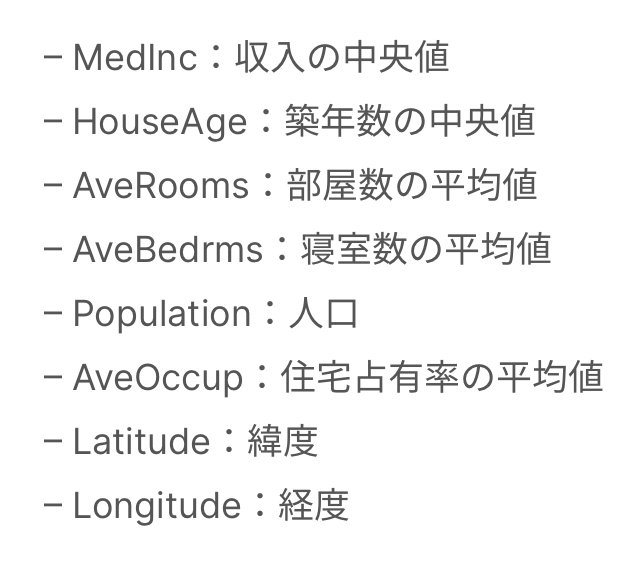

In [4]:
from rulefit import RuleFit
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rf = RuleFit()
rf.fit(X_train, y_train, feature_names=features)

/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8488883978452577, tolerance: 1.4648100154570833
  model = cd_fast.enet_coordinate_descent_gram(
/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.608719324998674, tolerance: 1.4648100154570833
  model = cd_fast.enet_coordinate_descent_gram(
/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.411124053941421, tolerance

RuleFit(tree_generator=GradientBoostingRegressor(learning_rate=0.01,
                                                 max_depth=100,
                                                 max_leaf_nodes=13,
                                                 n_estimators=565,
                                                 random_state=564,
                                                 subsample=0.05274916202773937))

In [5]:
pred = rf.predict(X_test)

In [6]:
pred

array([1.44330908, 2.82631517, 1.51853569, ..., 1.31359165, 2.67314966,
       1.81329489])

In [8]:
rules = rf.get_rules()
rules = rules[rules.coef != 0].sort_values(by="importance", ascending=False)

In [10]:
pd.set_option("display.max_colwidth", 999)
rules.head(10)

,rule,type,coef,support,importance
7,Longitude,linear,-0.105499,1.000000,0.205661
2,AveRooms,linear,0.158236,1.000000,0.192356
97,Latitude > 35.329999923706055 & Longitude <= -119.93500137329102,rule,-0.314376,0.379310,0.152540
1494,Longitude <= -122.3650016784668 & Latitude <= 38.68499946594238,rule,0.449354,0.077011,0.119802
795,Latitude <= 34.46999931335449 & AveRooms <= 88.98484802246094 & Longitude <= -118.3650016784668 & Latitude <= 34.15500068664551,rule,0.418515,0.044828,0.086601
131,Latitude > 37.77499961853027,rule,0.200591,0.224138,0.083649
1273,Latitude <= 37.90500068664551 & Longitude > -122.29500198364258 & Longitude <= -117.70499801635742 & Latitude <= 34.635000228881836,rule,0.161877,0.381609,0.078637
11,Latitude <= 34.27499961853027,rule,-0.153831,0.489655,0.076899
1603,AveRooms <= 88.98484802246094 & Latitude > 34.46999931335449 & Longitude > -119.89999771118164 & Longitude > -121.72999954223633,rule,-0.257230,0.085057,0.071759
820,Latitude > 34.48500061035156 & Longitude > -122.39500045776367 & Latitude > 37.614999771118164 & Longitude <= -120.10499954223633,rule,-0.178865,0.195402,0.070922


In [13]:
rf = RuleFit(max_rules=50, random_state=0)
rf.fit(X, y, feature_names=features)
y_pred = rf.predict(X)
rules = rf.get_rules()
rules = rules[rules.coef != 0].sort_values(by="importance", ascending=False)
rules.head(10)

,rule,type,coef,support,importance
6,Latitude,linear,-0.417520,1.000000,0.871862
7,Longitude,linear,-0.416862,1.000000,0.812130
0,MedInc,linear,0.393800,1.000000,0.662461
5,AveOccup,linear,-0.243307,1.000000,0.169213
20,MedInc > 3.076150059700012 & HouseAge > 19.0 & MedInc <= 5.779600143432617 & AveOccup <= 2.0966442823410034,rule,0.615633,0.045786,0.128680
1,HouseAge,linear,0.009025,1.000000,0.113143
3,AveBedrms,linear,0.979681,1.000000,0.105071
21,HouseAge > 27.0 & MedInc > 5.779600143432617,rule,0.288530,0.073881,0.075473
29,AveRooms > 4.314858436584473 & MedInc <= 5.7631001472473145 & MedInc <= 3.198949933052063,rule,-0.138948,0.259105,0.060879
10,MedInc > 4.302800178527832 & AveOccup > 2.6366926431655884 & MedInc <= 6.818049907684326,rule,-0.143179,0.171696,0.053995
